In [1]:
#importing  the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import xgboost as xgb
import sklearn

In [2]:
#reading the data and keeping the index as the date and time
path_data_file = '/Users/macos/Desktop/demoday/demoday/ML_Model/Turbine_Data.csv'
data = pd.read_csv(path_data_file,
                    parse_dates=['Unnamed: 0'],# Using parse_dates make working with time series easier by automatically converting the column Data/Time to pandas date/time object.
                    index_col=['Unnamed: 0']) # Using index_col to set this column as a temporal index.
data.index = pd.to_datetime(data.index)

In [3]:
# droping duplicate rows
data.drop_duplicates(inplace=True)

In [4]:
data.head()


,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2018-01-01 00:00:00+00:00,-5.357727,23.148729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.000000,-9.960830,NaN,NaN,G01,8.000000,2.279088
2018-01-01 00:10:00+00:00,-5.822360,23.039754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,300.428571,-9.628441,NaN,NaN,G01,300.428571,2.339343
2018-01-01 00:20:00+00:00,-5.279409,22.948703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,340.000000,-9.491235,NaN,NaN,G01,340.000000,2.455610
2018-01-01 00:30:00+00:00,-4.648054,22.966851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,345.000000,-9.856136,NaN,NaN,G01,345.000000,2.026754


In [5]:
unusual_features = ['ControlBoxTemperature','WTG'] #  the two irrelevant variables
data.drop(unusual_features, axis=1, inplace=True)

In [6]:
mask_power = data['ActivePower']>=0 # 'ActivePower' is a physical positive quantity which represents the active power of the wind turbine (watt/second).
data =  data[mask_power]

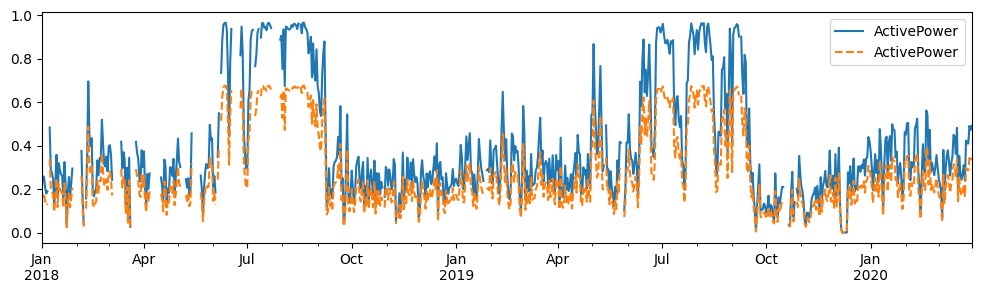

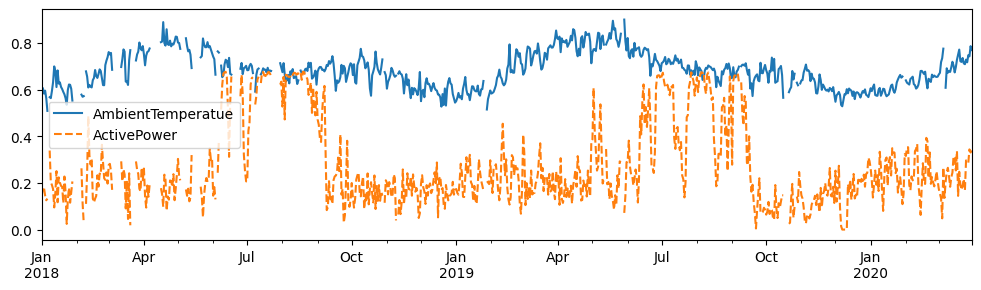

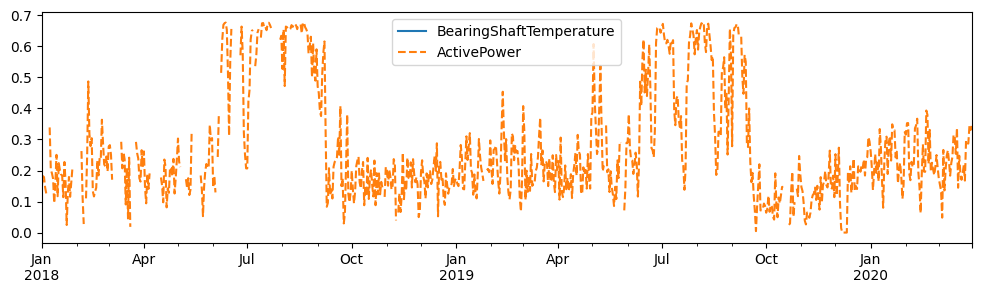

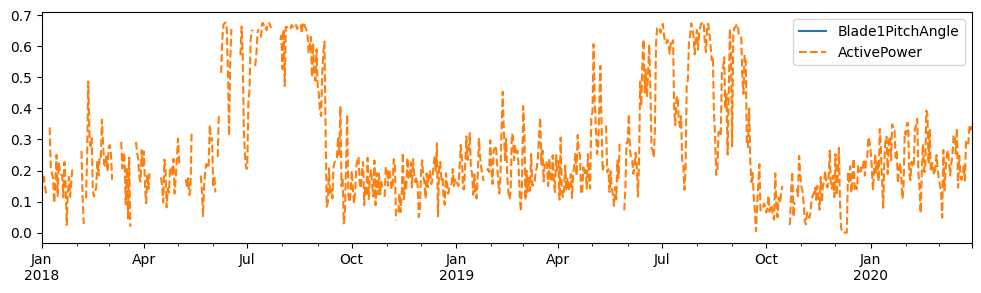

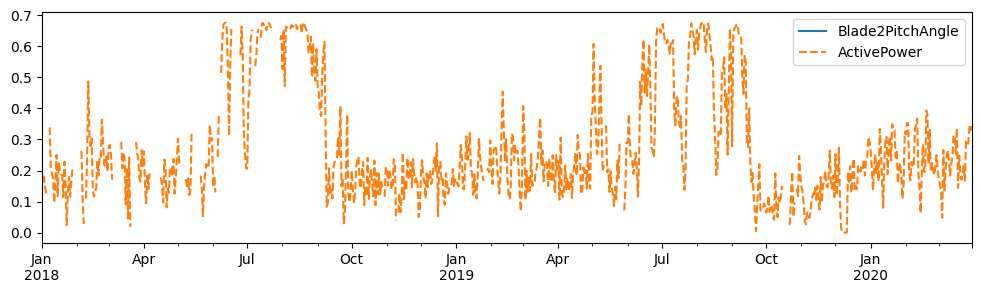

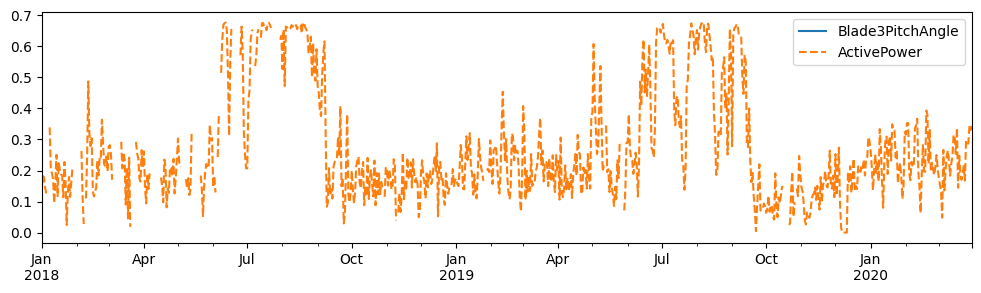

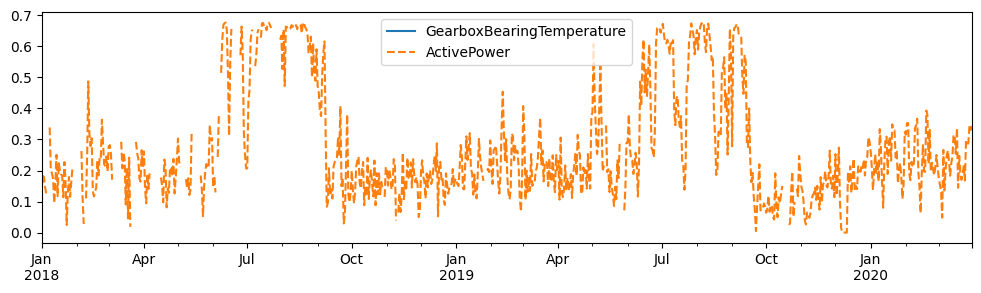

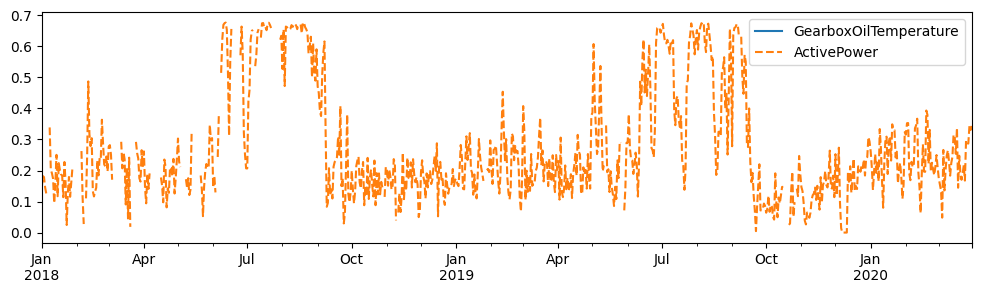

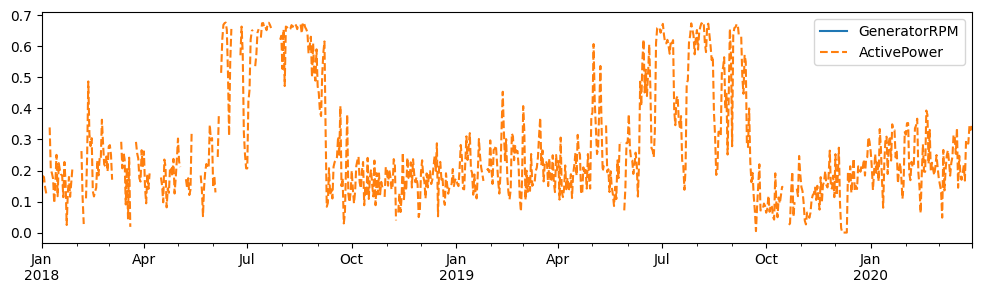

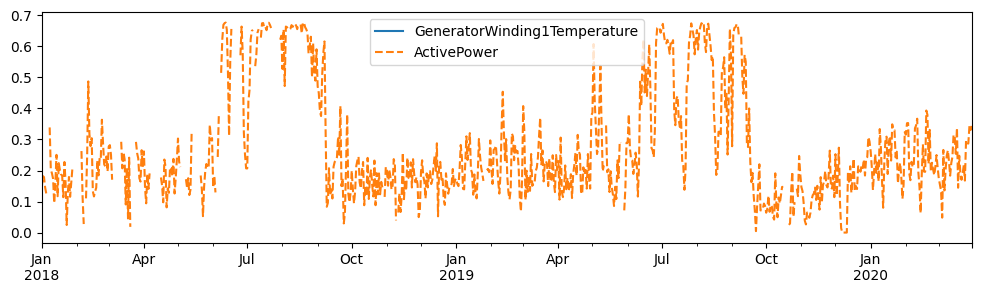

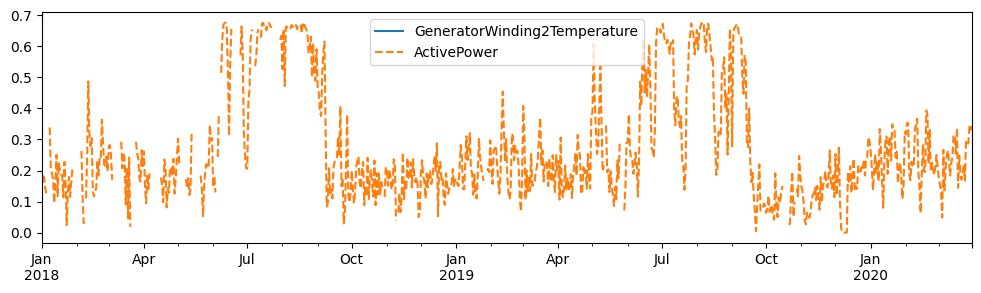

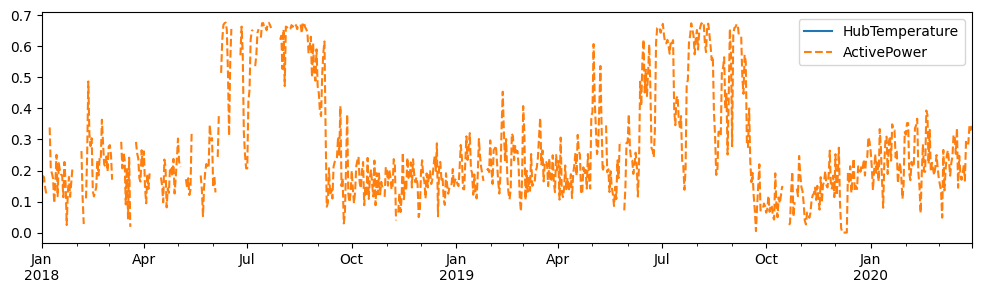

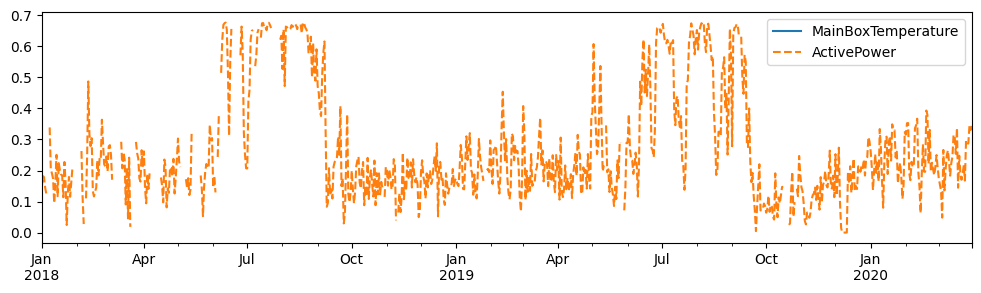

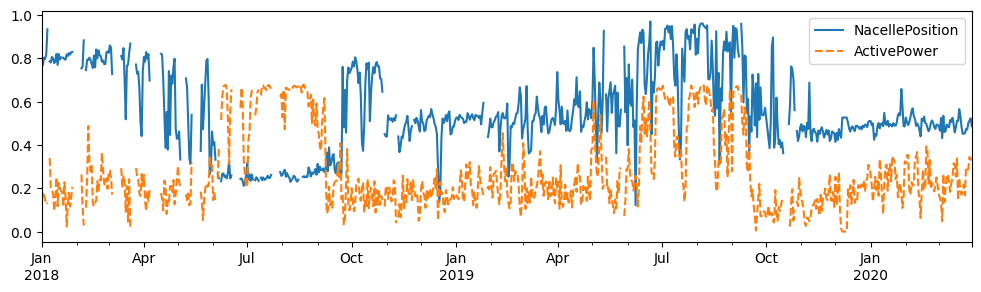

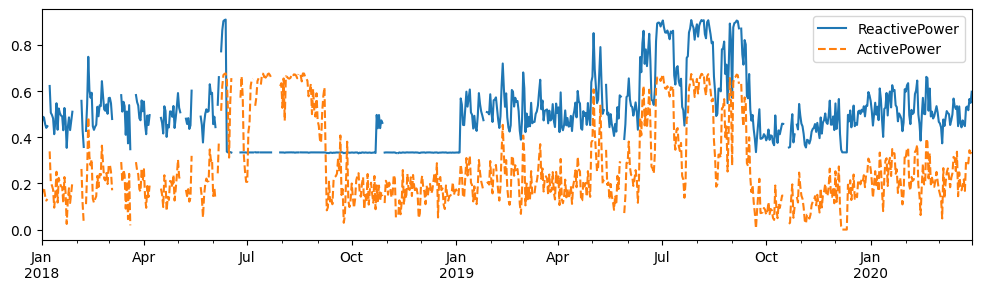

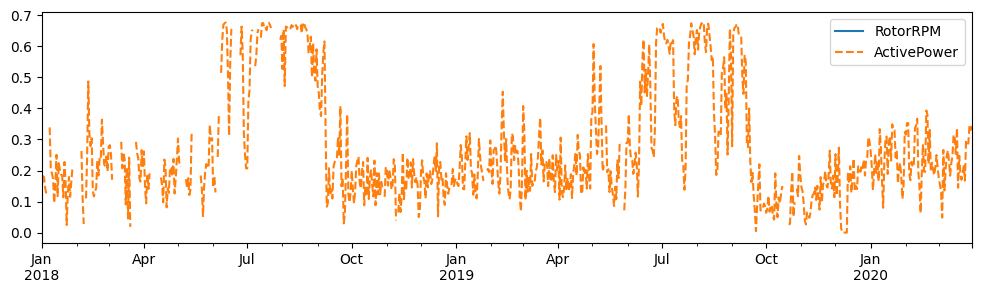

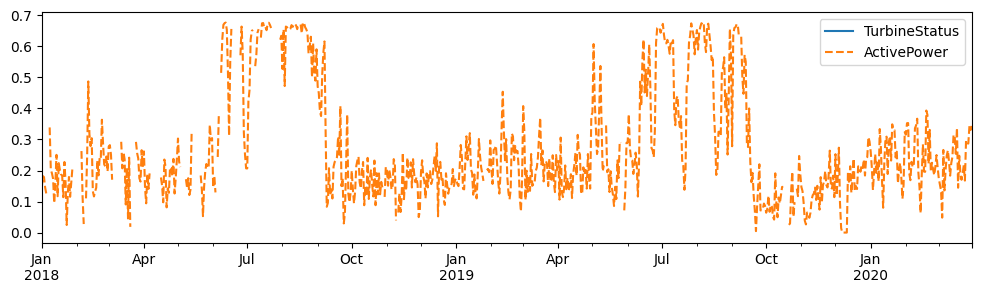

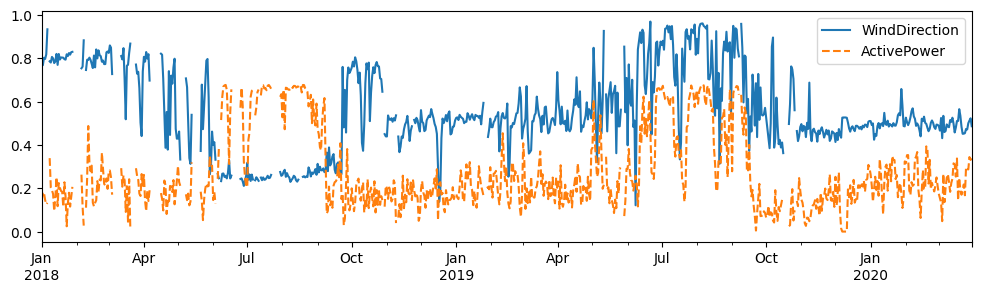

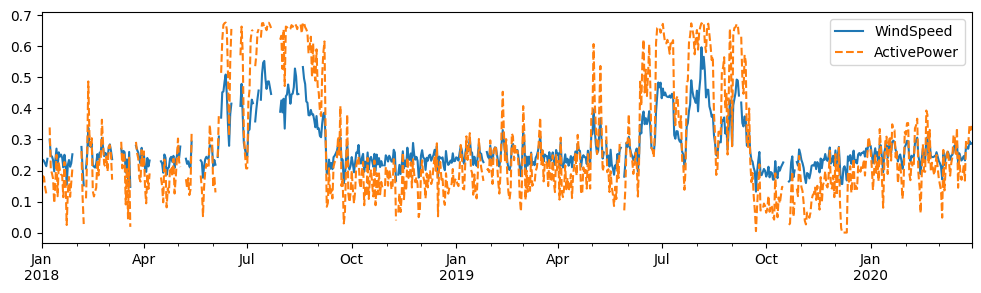

In [7]:
#data viz
data_viz = data.copy()
for i in data:
    mini = min(data_viz [i])
    maxi = max(data_viz [i])
    data_viz[i] = (data_viz[i]- mini)/(maxi-mini)# standardization
    
    plt.figure(figsize=(12,3))
    data_viz[i].resample('D').mean().plot(legend=i)  # aggregate the daily data  "D"
    (data_viz['ActivePower']* 0.7).resample('D').mean().plot(style='--', legend='ActivePower')
    plt.legend()
    plt.show()




In [8]:
data = data[['ActivePower','WindSpeed']]
data.dropna()  # drop the NaN values 
display(data.head())
print()
print("Done...")
print()
print(f'The data contains {data.shape[0]} rows and {data.shape[1]} features ')

,ActivePower,WindSpeed
2018-01-01 06:20:00+00:00,26.212347,3.042750
2018-01-01 06:40:00+00:00,59.632658,3.424814
2018-01-01 06:50:00+00:00,40.889650,3.507172
2018-01-01 10:40:00+00:00,34.398111,3.442212
2018-01-01 12:00:00+00:00,29.797653,3.031363



Done...

The data contains 78989 rows and 2 features 


In [9]:
data.isna().sum()
print()
data = data.dropna()
data.isna().sum()

ActivePower    0
WindSpeed      0
dtype: int64

In [10]:
X_train, X_test = data['WindSpeed'][0:78000], data['WindSpeed'][78000:]
y_train,y_test  = data['ActivePower'][0:78000],  data['ActivePower'][78000:]
len(X_train),len(X_test),len(y_train),len(y_test)

(78000, 681, 78000, 681)

In [11]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
# Construction du modèle LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(10, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

2023-12-13 14:17:58.422650: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# Entraînement du modèle
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


2438/2438 [==============================] - 7s 2ms/step - loss: 817788.5000
Epoch 2/50
2438/2438 [==============================] - 5s 2ms/step - loss: 698088.0000
Epoch 3/50
2438/2438 [==============================] - 5s 2ms/step - loss: 597384.6875
Epoch 4/50
2438/2438 [==============================] - 5s 2ms/step - loss: 507716.4375
Epoch 5/50
2438/2438 [==============================] - 5s 2ms/step - loss: 429571.7812
Epoch 6/50
2438/2438 [==============================] - 5s 2ms/step - loss: 361027.5938
Epoch 7/50
2438/2438 [==============================] - 5s 2ms/step - loss: 300966.0938
Epoch 8/50
2438/2438 [==============================] - 5s 2ms/step - loss: 248465.7969
Epoch 9/50
2438/2438 [==============================] - 5s 2ms/step - loss: 202819.1562
Epoch 10/50
2438/2438 [==============================] - 5s 2ms/step - loss: 163400.0156
Epoch 11/50
2438/2438 [==============================] - 5s 2ms/step - loss: 129638.5547
Epoch 12/50
2438/2438 [==================

In [13]:
# Prédiction sur l'ensemble de test
predictions = model.predict(X_test)

22/22 [==============================] - 1s 2ms/step


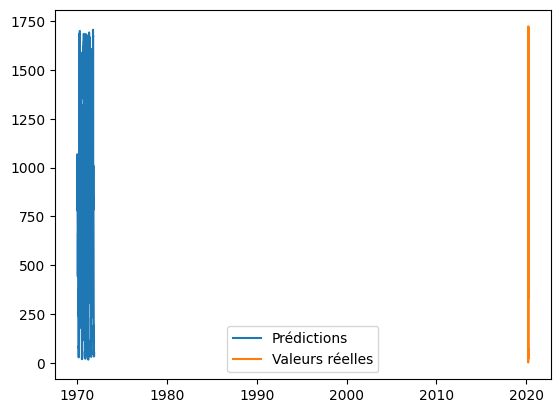

In [17]:
# Visualisation des résultats
plt.plot(predictions, label='Prédictions')
plt.plot(y_test, label='Valeurs réelles')
plt.legend()
plt.show()